In [1]:
import sys
sys.path.append("/media/hdd/viscent/SR-UNet")
from utils.inference_utils import *

In [2]:
%%capture
dhcp_train_loader, dhcp_test_loader, dhcp_val_loader = get_dataloader('dhcp',50,modality='t2')
hcp_train_loader, hcp_test_loader, hcp_val_loader = get_dataloader('hcp',50,modality='t2')

<Figure size 1440x720 with 0 Axes>

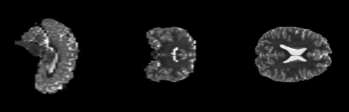

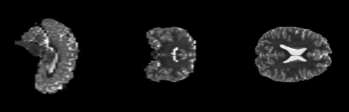

In [4]:
display_multiplanar_center(iter(hcp_train_loader).next()[0][0,0])

<Figure size 1440x720 with 0 Axes>

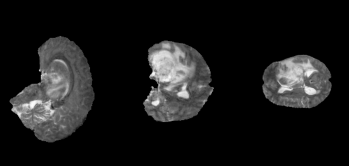

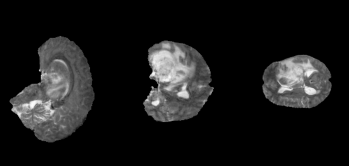

In [11]:
img = sitk.ReadImage('/media/hdd/BraTS2020/BraTS20_Training_001/BraTS20_Training_001_t2.nii.gz')
img_array = sitk.GetArrayFromImage(img)
img_array = img_array.transpose(2,1,0)
display_multiplanar_center(img_array)

<Figure size 1440x720 with 0 Axes>

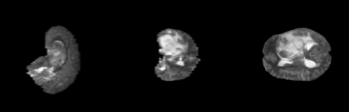

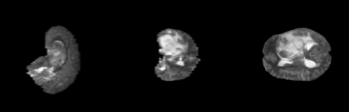

In [25]:
spacing = [1.5,1.5,5.0]
spacing = np.array(spacing)
subject = tio.Subject(
    image_t2 = tio.ScalarImage('/media/hdd/BraTS2020/BraTS20_Training_001/BraTS20_Training_001_t2.nii.gz')
)
transform_1 = tio.Compose([
    tio.transforms.RescaleIntensity((0., 1.)),
    tio.transforms.Resample(spacing),
    tio.transforms.Resample((1.,1.,1.)),
    tio.transforms.RandomGamma((0.2,0.2))
])
transform_1_gt = tio.Compose([
    tio.transforms.RescaleIntensity(0., 1.),
    tio.transforms.ToCanonical(),
    tio.transforms.Resample((1.,1.,1.)),
])
subject_gt = transform_1_gt(subject)
subject = transform_1(subject)
edge_max = max(subject.image_t2.data.shape)
padding = ((edge_max - subject.image_t2.data.shape[1]) // 2, 
            (edge_max - subject.image_t2.data.shape[2]) // 2,
                (edge_max - subject.image_t2.data.shape[3]) // 2)
transform_2 = tio.Compose([
    tio.Pad(padding),
    tio.transforms.Resize((160,160,160)),
])
transform_2_gt = tio.Compose([
    tio.Pad(padding),
    tio.transforms.Resize((160,160,160)),
])
subject_gt = transform_2_gt(subject_gt)
subject = transform_2(subject)
display_multiplanar_center(subject.image_t2.data[0])

/home/viscent/anaconda3/envs/bunet/lib/python3.10/site-packages/torchio/transforms/preprocessing/intensity/rescale.py:99: RuntimeWarning:

Rescaling image "image_t2" not possible because all the intensity values are the same



<Figure size 1440x720 with 0 Axes>

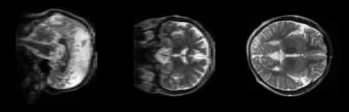

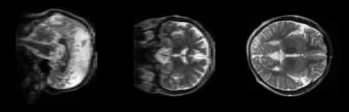

In [16]:
subject = tio.Subject(
    image_t2 = tio.ScalarImage('/media/hdd/viscent/SR-UNet/inference/Yiqi_Hyperfine-2/Yiqi_MRe_T2_(AXI)_20220715155618_6.nii')
)
transform_1 = tio.Compose([
    tio.transforms.RescaleIntensity(0., 1.),
    tio.transforms.ToCanonical(),
    tio.transforms.Resample((1.,1.,1.)),
])
subject = transform_1(subject)
edge_max = max(subject.image_t2.data.shape)
padding = ((edge_max - subject.image_t2.data.shape[1]) // 2, 
            (edge_max - subject.image_t2.data.shape[2]) // 2,
                (edge_max - subject.image_t2.data.shape[3]) // 2)
transform_2 = tio.Compose([
    tio.Pad(padding),
    tio.transforms.Resize((160,160,160)),
])
subject = transform_2(subject)
display_multiplanar_center(subject.image_t2.data[0])